In [141]:
import pandas as pd
from functions import split_by_artist_given, split_by_strata_artist, split_by_strata_artist_designer
import torch
from functions import *
from matplotlib import pyplot as plt
from PIL import Image
dataset_name = "wikiart"
artist_split = False

if dataset_name == 'wikiart':
    df = pd.read_pickle('DATA/Dataset/wikiart/wikiart_full_combined_no_artist_filtered.pkl')
    feature_extractor = "ResNet34_newsplit"
    df = split_by_strata_artist(df)
    feature = "image_text_features"
    
elif dataset_name == 'fashion':
    df = pd.read_pickle('DATA/Dataset/iDesigner/idesigner_influences_cropped_features_mode.pkl')
    feature_extractor = "ResNet34_newsplit"
    feature = "image_features"
    #df = split_by_strata_artist(df)
    #df = split_by_strata_artist_designer(df)
    





# if artist_split:
#     artist_name = "paul-gauguin"
#     feature_extractor = "Artists"
#     df = split_by_artist_given(df, artist_name)
#     IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/{artist_name}_TripletResNet_image_text_features_posrandom_negrandom_100_margin1/IR_metrics/metrics_val.pth')
#     #IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/{artist_name}_TripletResNet_image_features_posrandom_negrandom_100_margin1/IR_metrics/metrics_val.pth')
#     baseline_IR = torch.load(f"trained_models/{dataset_name}/{feature_extractor}/baseline_IR_metrics/{artist_name}_image_text_features.pth")
# else:

IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/TripletResNet_{feature}_posfaiss_negrandom_100_margin1_notrans_epoch_30/IR_metrics/metrics_val.pth')
#baseline_IR = torch.load(f"trained_models/{dataset_name}/{feature_extractor}/baseline_IR_metrics/{feature}_val.pth")

indeces = list(df[df['mode'] == 'val'].index)

In [136]:
feature = "image_text_features"

IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/TripletResNet_{feature}_posrandom_negrandom_100_margin1_notrans_epoch_30/IR_metrics/metrics_val.pth')
baseline_IR = torch.load(f"trained_models/{dataset_name}/{feature_extractor}/baseline_IR_metrics/{feature}_val.pth")

indeces = list(df[df['mode'] == 'val'].index)
indices = df[(df['mode'] == 'val') & (df['artist_name'] == 'vincent-van-gogh')].index.tolist()

In [142]:
indices = df[(df['mode'] == 'val') & (df['artist_name'] == 'vincent-van-gogh')].index.tolist()

In [144]:
def plot_examples(dataset_name, query, positive_indexes, df):
    # Plot single image
    if dataset_name == 'wikiart':
        general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/'
    elif dataset_name == 'fashion':
        general_image_path = 'DATA/Dataset/iDesigner/designer_image_train_v2_cropped/'
    plt.figure(figsize=(10, 5))
    plt.imshow(Image.open(general_image_path + df.loc[query].relative_path))
    plt.axis('off')
    if dataset_name == 'wikiart':
        title_str = (r"$\bf{Agent:}$ " + df.loc[query].artist_name + '\n'
             r"$\bf{Influencers:}$ " + ',\n'.join(df.loc[query].influenced_by) + 
             '\n' + r"$\bf{date:}$ " + str(df.loc[query].date))
    else:
        title_str = (r"$\bf{Agent:}$ " + df.loc[query].artist_name + '\n'
             r"$\bf{Influencers:}$ " + ',\n'.join(df.loc[query].influenced_by))
    plt.title(title_str , fontsize=10)
    plt.show()
    # Plot grid of images
    fig, axes = plt.subplots(1,10, figsize=(20, 20))  # 5 rows, 2 columns
    for i, ax in enumerate(axes.flatten()):
        if i < len(positive_indexes):
            image_path = general_image_path + df.iloc[positive_indexes[i]].relative_path
            image = Image.open(image_path)
            ax.imshow(image)
            ax.axis('off')
            if dataset_name == 'wikiart':
                title_str = (r"$\bf{rank:}$ " + str(i+1) + '\n'
                r"$\bf{Agent:}$ " +df.iloc[positive_indexes[i]].artist_name +'\n' + r"$\bf{date:}$ " + str(df.loc[i].date))
            else:
                title_str = (r"$\bf{rank:}$ " + str(i+1) + '\n'
                r"$\bf{Agent:}$ " +df.iloc[positive_indexes[i]].artist_name)

            ax.set_title(title_str, fontsize = 10)
        else:
            ax.axis('off')  # Hide unused subplots

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

In [60]:
indices = df[(df['mode'] == 'val') & (df['artist_name'] == 'alexander mcqueen')].index.tolist()


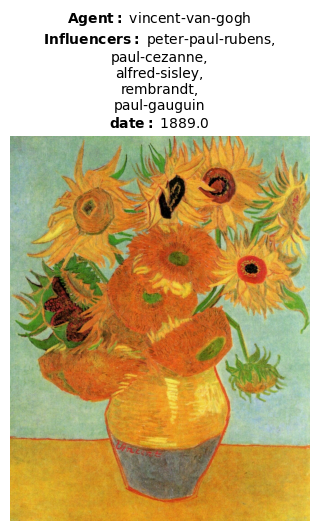

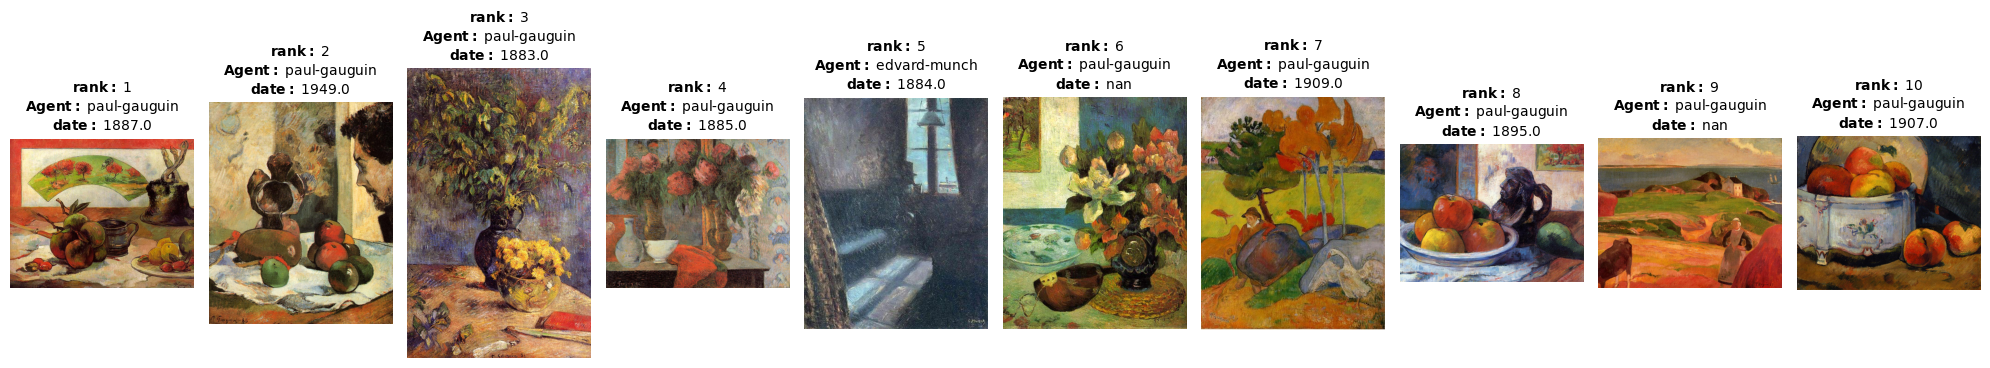

In [145]:
i = 1


plot_examples(dataset_name, indices[i],IR_metrics['retrieved_indexes'][indices[i]], df)

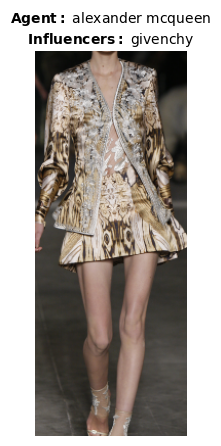

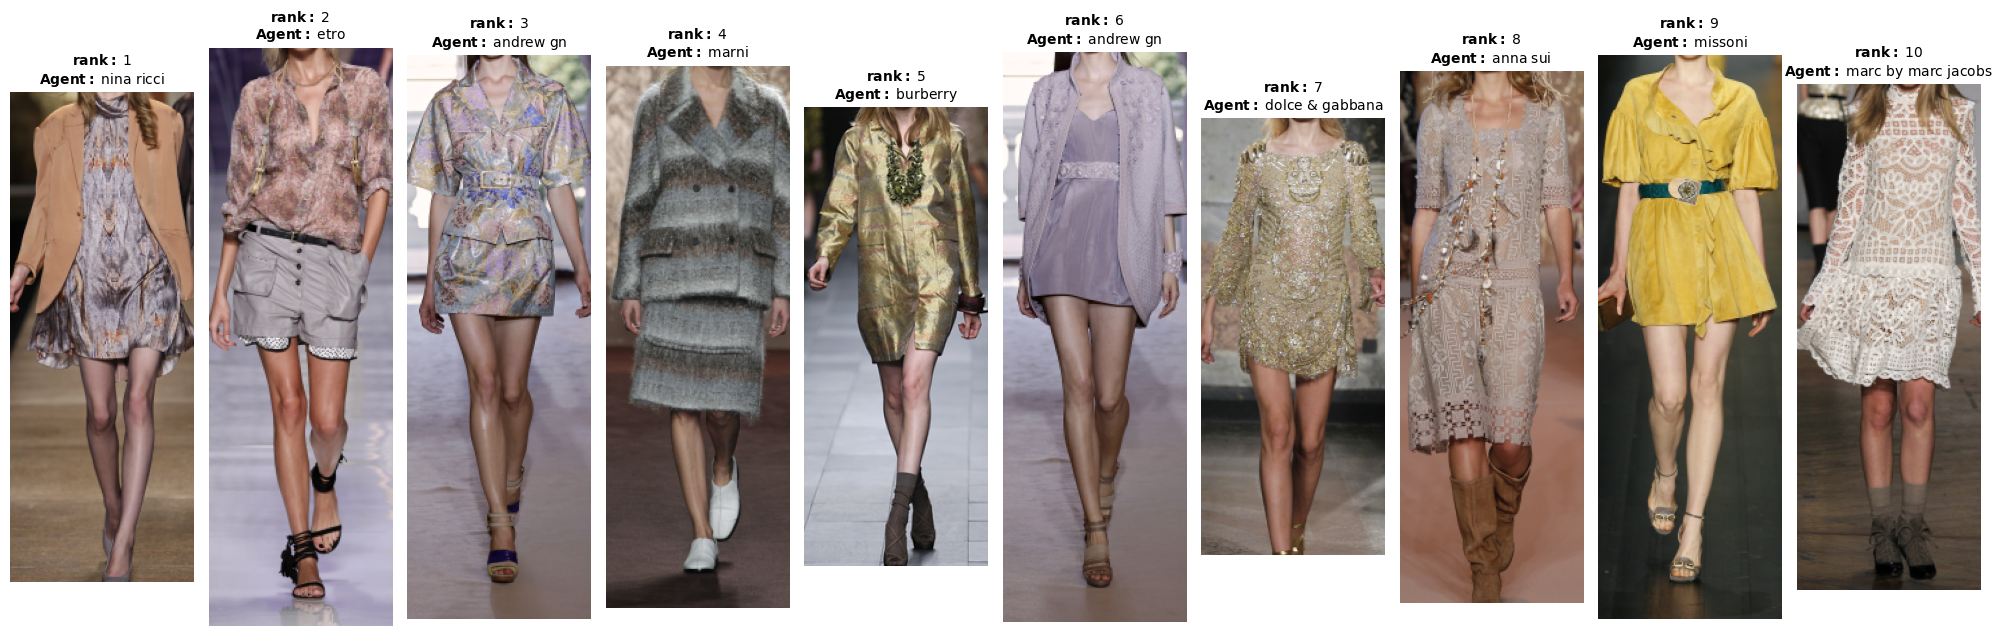

In [57]:



plot_examples(dataset_name, indices[i],baseline_IR['retrieved_indexes'][indices[i]], df)

In [22]:
len(IR_metrics['retrieved_indexes'].index)

11052

In [108]:
df

image  \
0      camille-pissarro_the-harvest-of-hay-in-eragny-...   
1              david-burliuk_marusia-by-the-sea-1949.jpg   
2                 georges-seurat_boy-with-horse-1883.jpg   
3      georges-seurat_the-english-channel-at-grandcam...   
4                   georges-seurat_the-gardener-1884.jpg   
...                                                  ...   
39810            gustave-dore_devils-and-seducers(1).jpg   
39811             gustave-dore_the-innocent-souls(1).jpg   
39812                        gustave-dore_ugolino(1).jpg   
39813                     ivan-aivazovsky_storm-1889.jpg   
39814  ivan-aivazovsky_the-great-roads-at-kronstadt-1...   

                                           relative_path style_classification  \
0      Pointillism/camille-pissarro_the-harvest-of-ha...   post_impressionism   
1      Post_Impressionism/david-burliuk_marusia-by-th...   post_impressionism   
2      Post_Impressionism/georges-seurat_boy-with-hor...   post_impressionism   
3      Pointillism/georges-seurat_the-english-channel...   post_impressionism   
4       Pointillism/georges-seurat_the-gardener-1884.jpg   post_impressionism   
...                                                  ...                  ...   
39810  Romanticism/gustave-dore_devils-and-seducers(1...          romanticism   
39811  Romanticism/gustave-dore_the-innocent-souls(1)...          romanticism   
39812            Romanticism/gustave-dore_ugolino(1).jpg          romanticism   
39813         Romanticism/ivan-aivazovsky_storm-1889.jpg          romanticism   
39814  Romanticism/ivan-aivazovsky_the-great-roads-at...          romanticism   

      artist_attribution timeframe_estimation  \
0       camille-pissarro            1850-1900   
1          david-burliuk            1900-1950   
2         georges-seurat            1850-1900   
3         georges-seurat            1850-1900   
4         georges-seurat            1850-1900   
...                  ...                  ...   
39810       gustave-dore            1850-1900   
39811       gustave-dore            1850-1900   
39812       gustave-dore            1850-1900   
39813    ivan-aivazovsky            1850-1900   
39814    ivan-aivazovsky            1850-1900   

                                tag_prediction   mode    date  \
0                                          NaN  train  1887.0   
1                             female-portraits  train  1949.0   
2                                      animals  train  1883.0   
3                                        water  train  1885.0   
4                                         tree    val  1884.0   
...                                        ...    ...     ...   
39810               fictional-characters,human  train     NaN   
39811                fictional-characters,tree    val     NaN   
39812                     fictional-characters  train     NaN   
39813                                      NaN    val     NaN   
39814  boats-and-ships,seas-and-oceans,vehicle    val  1836.0   

            artist_name additional_styles       artist_school  \
0      camille-pissarro               NaN      french, jewish   
1         david-burliuk               NaN  ukrainian, russian   
2        georges-seurat               NaN              french   
3        georges-seurat               NaN              french   
4        georges-seurat               NaN              french   
...                 ...               ...                 ...   
39810      gustave-dore               NaN              french   
39811      gustave-dore               NaN              french   
39812      gustave-dore               NaN              french   
39813   ivan-aivazovsky               NaN   russian, armenian   
39814   ivan-aivazovsky               NaN   russian, armenian   

                                                    tags  \
0                                                          
1                       female-portraits,marusia-burliuk   
2                         

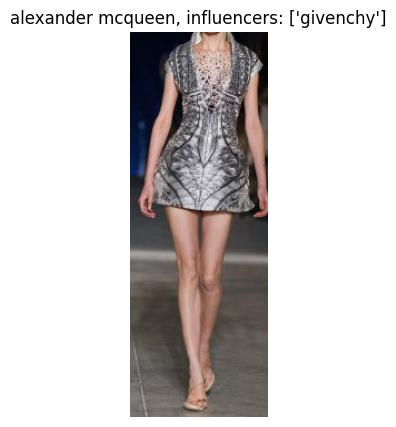

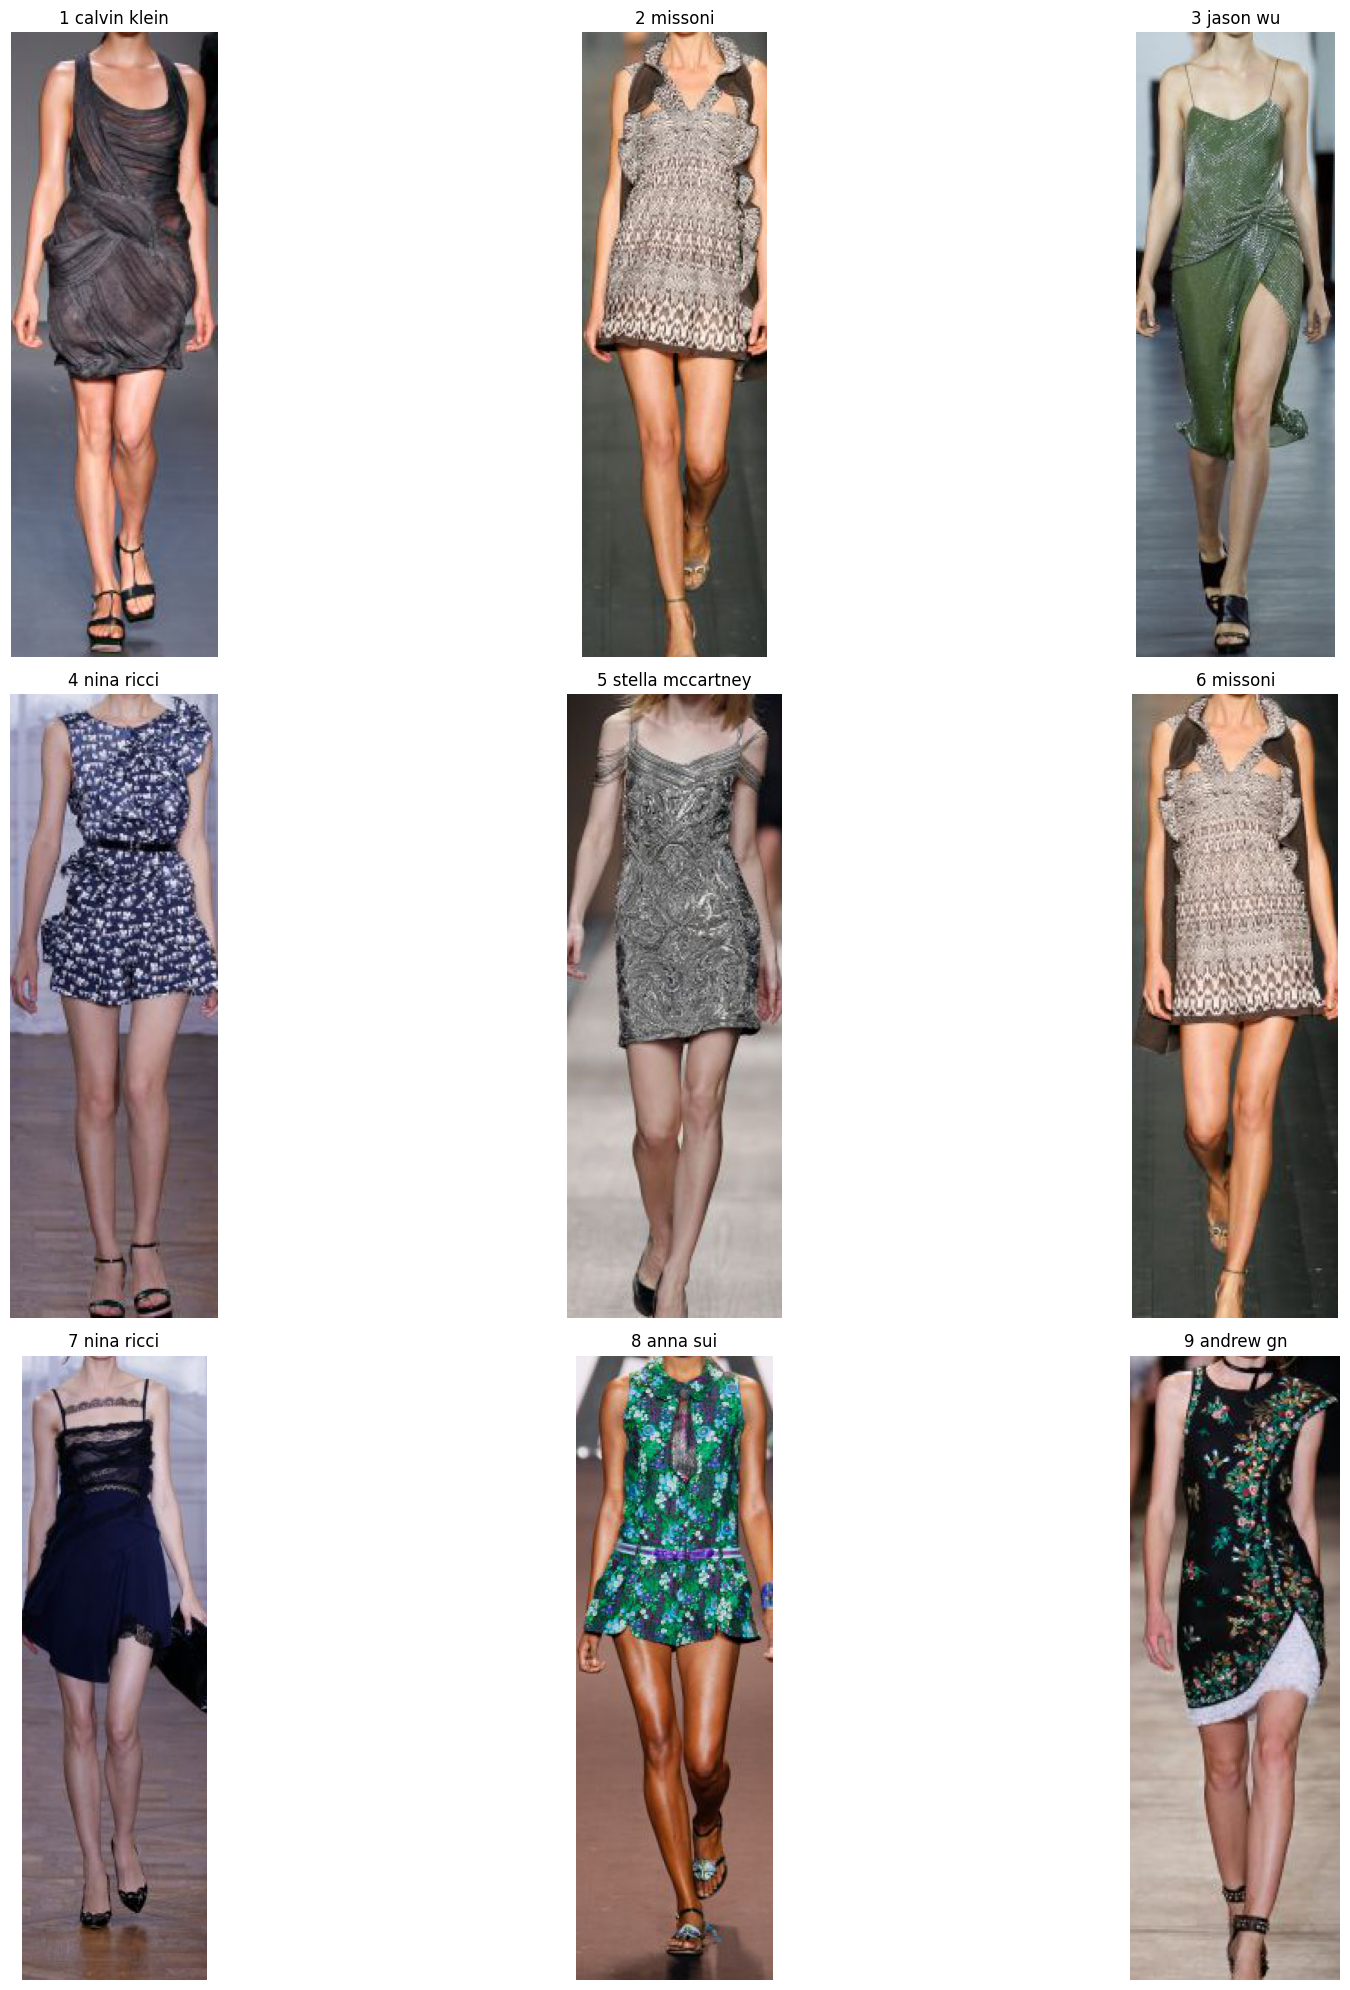

In [10]:

plot_examples(dataset_name, indeces[i],baseline_IR['retrieved_indexes'][indeces[i]], df_new)

In [2]:
import torch
from create_data_loader import TripletLossDataset_features
data = torch.load('DATA/Dataset_toload/wikiart/ResNet34/train_dataset_image_text_features_posfaiss_negrandom_100.pt')


In [24]:
IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/TripletResNet_image_features_posfaiss_negrandom_100_margin1/IR_metrics/metrics_train.pth')
indeces = list(df_new[df_new['mode'] == 'train'].index)
baseline_IR = torch.load(f"trained_models/{dataset_name}/{feature_extractor}/baseline_IR_metrics/image_features_train.pth")

In [15]:
#Realism/edouard-manet_olympia-1863.jpg
#Post_Impressionism/paul-gauguin_the-spirit-of-the-dead-watches-1892.jpg

#Post_Impressionism/vincent-van-gogh_the-starry-night-1889(1).jpg
df_new[df_new['relative_path'] == 'Post_Impressionism/paul-gauguin_the-spirit-of-the-dead-watches-1892.jpg']
df_new[df_new['relative_path'] == 'Post_Impressionism/vincent-van-gogh_the-starry-night-1889(1).jpg']

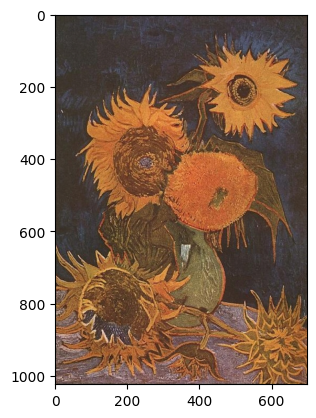

In [61]:
plt.imshow(Image.open(general_image_path+'Post_Impressionism/vincent-van-gogh_the-starry-night-1889(1).jpg'))

plt.imshow(Image.open(general_image_path+'Post_Impressionism/vincent-van-gogh_still-life-vase-with-five-sunflowers-1888.jpg'))

In [8]:
from matplotlib import pyplot as plt
from PIL import Image
general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/'
def plot_examples(query, positive_indexes, df):
    # Plot single image
    plt.figure(figsize=(10, 5))
    plt.imshow(Image.open(general_image_path + df.loc[query].relative_path))
    plt.axis('off')
    plt.title(str(df.loc[query].artist_name + ', influencers: ' + str(df.loc[query].influenced_by)))
    plt.show()

    # Plot grid of images
    fig, axes = plt.subplots(3,3, figsize=(20, 20))  # 5 rows, 2 columns
    for i, ax in enumerate(axes.flatten()):
        if i < len(positive_indexes):
            image_path = general_image_path + df.iloc[positive_indexes[i]].relative_path
            image = Image.open(image_path)
            ax.imshow(image)
            ax.axis('off')
            ax.set_title(str(i+1)+" "+ df.iloc[positive_indexes[i]].artist_name)
        else:
            ax.axis('off')  # Hide unused subplots

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
